# Convolutions and Dimensions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline

### Convlutions


#### Apply to arrays (20 points)

Apply the convolutions above to the following array, using numpy:


In [ ]:
x = np.array([[-1, -3, -4,  0, -1],
              [ 2, -2, -4,  0, -2],
              [-3, -2,  2,  2,  3],
              [ 0, -3, -4, -4, -2],
              [-4, -2,  2,  0,  1]])

In [ ]:
k1 = np.array([ [0, 0, 0], [0, 1, 0], [0, 0, 0] ])
k2 = np.array([ [0, 0, 0], [0, 0, 1], [0, 0, 0] ])
k3 = np.array([ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1] ])
k4 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1] ]) / 9

In [ ]:
from numpy.lib.stride_tricks import sliding_window_view
def apply_conv(data, filter):

    view = sliding_window_view(data, filter.shape) * filter

    view=view.sum(axis=-1).sum(axis=-1)

    return view

apply_conv(x,k1)

array([[-2, -4,  0],
       [-2,  2,  2],
       [-3, -4, -4]])

In [ ]:
apply_conv(x,k2)

array([[-4,  0, -2],
       [ 2,  2,  3],
       [-4, -4, -2]])

In [ ]:
apply_conv(x,k3)

array([[ -3, -25,   4],
       [ -4,  33,  27],
       [-13, -27, -36]])

In [ ]:
apply_conv(x,k4)

array([[-1.66666667e+00, -1.22222222e+00, -4.44444444e-01],
       [-1.55555556e+00, -1.66666667e+00, -1.00000000e+00],
       [-1.55555556e+00, -1.00000000e+00, -1.66533454e-16]])

#### Apply to images (20 points)
Apply the convolution filters above on the image. You should convert the image to grayscale, and apply the filters on the grayscale image.
Show the results:

<ipython-input-9-9c480a274604>:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = scipy.misc.face()


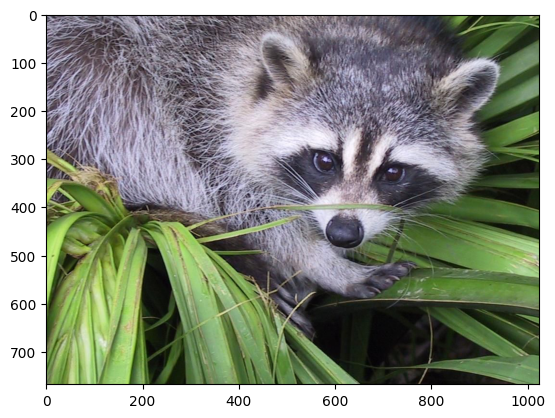

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc
face = scipy.misc.face()
plt.imshow(face/255); plt.show()

In [ ]:
from PIL.Image import fromarray
gray = np.array(fromarray(face).convert('L')) / 255

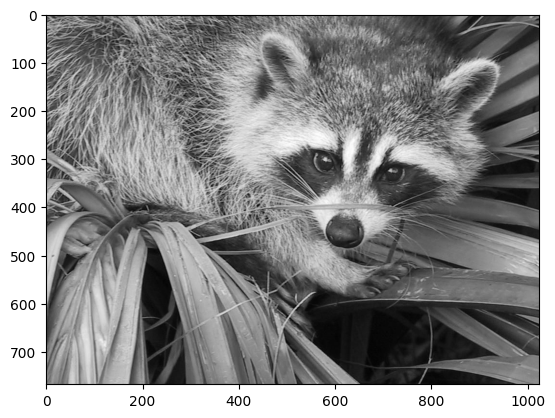

In [ ]:
plt.imshow(gray, cmap='gray')

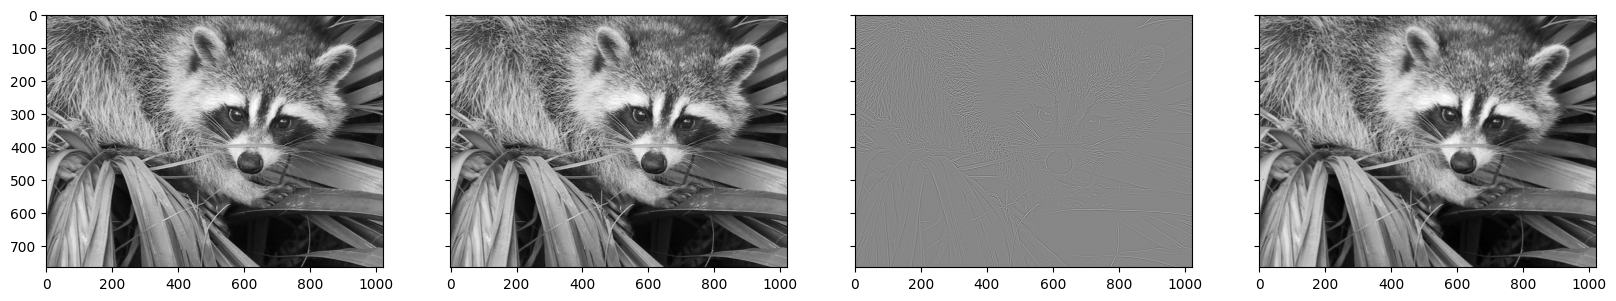

In [ ]:
fig, axs = plt.subplots(1,4, sharey=True, figsize=(20,5))
for ax, ker in zip(axs, [k1,k2,k3,k4]):
    ax.imshow(apply_conv(gray,ker), cmap='gray')
plt.show()

## Dimensions (20 points)

What would be the output dimensions in these cases (input size is NxN)?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account the padding option and the stride.

'Zero padding' means that we padded by floor(kernel_sz/2) in every dimension

With padding $p$, input size $N$, kernel size $k$ stride $s$ and output size $o$ :

$o=floor(\frac{N-(k - p)}{s}) + 1$

So:

1. $ N -k + 1$
2. $ \frac{N -k}{2} + 1$
3. $ N -k + 2*floor(\frac{k}{2}) + 1 → $ same dimension
4. $ \frac{N -k + 2*floor(\frac{k}{2})}{2} + 1$



### Network dimensions (40 points)
Below is a network architecture suggestion for classificy MNIST data.
Write: \\
(1) the output dimensions of evrry layer in the format (C,W,H) -> (#channels, width, height) \\
(2) the number of parameters at every layer \\
(3) number of calculations made in each layer

- Convolutional Layer #1: Applies 32 5x5 filters, with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


Assuming MNIST is 28x28x1 and that calculations are Fused-Multiply-Add:


**Conv 1**
*   Output: 24 x 24 x 32
*   Parameters: $ 32 * 5 * 5 + 32 = 832 $
*   Calculations: $(5*5)*(24*24*32)=460,800$

**Pooling 1**
*   Output: $12 x 12 x 32$
*   Parameters: 0
*   Calculations: $(24 / 2) * 32 * (24 / 2) = 4,608$

**Conv2**
*   Output: 8 x 8 x 64
*   Parameters: $64 * 5 * 5 * 32 + 64 = 51,264$
*   Calculations: $(5*5*64)*(12*12*32)=7,372,800$

**Pooling 2**
*   Output: 4 x 4 x 64
*   Parameters: 0
*   Calculations: $(8 / 2) * 64 * (8 / 2) = 1,024$

**Dense 1**
*   Output: 1,024
*   Parameters: $1,024 * 4*4*64 + 1,024 = 1,049,600$
*   Calculations: $1,024*(4*4*64)*0.6 + 1024=630,169$

**Dense 2**
*   Output: 10
*   Parameters: $10*1,024 + 10=10,250$
*   Calculations: 10,250

